# How to Use Python for Learning Vector Quantization From Scratch

In [1]:
!pwd

/Users/ar314706/learn/python


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import math

digits = datasets.load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

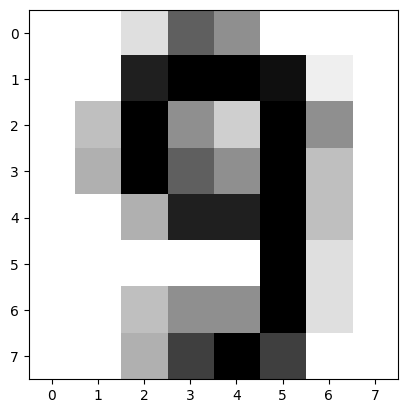

In [3]:
plt.imshow(digits.images[-2], cmap='gray_r')
plt.show()

In [4]:
digits.target[-2]

9

In [7]:
X = digits.data
Y = digits.target

#print('')
#X
#
#print('')
#
#Y

print('')
X, Y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=False, test_size=0.3)

In [11]:
def lvq_train(X, y, a, b, max_ep, min_a, e):
    c, train_idx = np.unique(y, True)
    r = c
    W = X[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])
    X = train[:, 0]
    y = train[:, 1]
    ep = 0
 
    while ep < max_ep and a > min_a:
        for i, x in enumerate(X):
            d = [math.sqrt(sum((w - x) ** 2)) for w in W]
            min_1 = np.argmin(d)
 
            min_2 = 0
            dc = float(np.amin(d))
            dr = 0
            min_2 = d.index(sorted(d)[1])
            dr = float(d[min_2])
            if c[min_1] == y[i] and c[min_1] != r[min_2]:
                W[min_1] = W[min_1] + a * (x - W[min_1])
 
            elif c[min_1] != r[min_2] and y[i] == r[min_2]:
                if dc != 0 and dr != 0:
 
                    if min((dc/dr),(dr/dc)) > (1-e) / (1+e):
                        W[min_1] = W[min_1] - a * (x - W[min_1])
                        W[min_2] = W[min_2] + a * (x - W[min_2])
            elif c[min_1] == r[min_2] and y[i] == r[min_2]:
                W[min_1] = W[min_1] + e * a * (x - W[min_1])
                W[min_2] = W[min_2] + e * a * (x- W[min_2])
        a = a * b
        ep += 1
    return W, c

def lvq_test(x, W):
    
    W, c = W
    d = [math.sqrt(sum((w - x) ** 2)) for w in W]
 
    return c[np.argmin(d)]


In [12]:
W = lvq_train(x_train, y_train, 0.2, 0.5, 100, 0.001, 0.3)
W

/var/folders/tt/y6pnmvt91rxbw_b2m0jt4dj40000gp/T/ipykernel_43852/1390579980.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])


(array([[ 0.00000000e+00,  4.47663115e-02,  4.24301447e+00,
          1.29272709e+01,  1.16740193e+01,  3.44186129e+00,
          4.06720049e-02,  0.00000000e+00,  0.00000000e+00,
          1.07331639e+00,  1.27122963e+01,  1.27458352e+01,
          1.05645441e+01,  1.17136003e+01,  1.25905350e+00,
          0.00000000e+00,  0.00000000e+00,  4.02867738e+00,
          1.40534853e+01,  4.36555425e+00,  1.84830361e+00,
          1.16064501e+01,  3.96973039e+00,  0.00000000e+00,
          0.00000000e+00,  5.47032479e+00,  1.23593791e+01,
          1.39949702e+00,  1.44537789e-01,  8.79927561e+00,
          6.59088392e+00,  0.00000000e+00,  0.00000000e+00,
          6.02146032e+00,  1.11125684e+01,  4.84781400e-01,
          3.54719256e-02,  8.88492781e+00,  7.03804629e+00,
          0.00000000e+00,  0.00000000e+00,  3.60218963e+00,
          1.28860842e+01,  1.36994805e+00,  1.41980742e+00,
          1.11896366e+01,  5.59606955e+00,  0.00000000e+00,
          0.00000000e+00,  8.20977810e-0

In [14]:
predicted = []
for i in x_test:
    predicted.append(lvq_test(i, W))


In [15]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'weighted')))
print_metrics(y_test, predicted)

Precision Score: 0.8793215182118257
Recall Score: 0.8703703703703703
Accuracy Score: 0.8703703703703703
F1 Score: 0.8719772817748163
